# Solve Heat Equation

$
U_t = U_{yy} + S(1 - e^{-u})
$

In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [42]:
# parameters
alpha = 1  # is related to the material
N = 200   # number of time steps
J = 100    # number of space steps

# some constant S which is related to material
S = 20

In [43]:
def TDMA(a,b,c,d):
    n = len(d)
    w= np.zeros(n-1,float)
    g= np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

In [44]:
T = 1
dx = 1/J   # step size of x axis
dt = 1/N   # step size of t axis
r = alpha * dt / (dx * dx)
x = np.arange(J + 1) * dx
t = np.arange(N + 1) * dt

In [45]:
# get the initial condition
u_0 = np.zeros(J + 1)
for i in range(1,J):
     u_0[i] = math.sin(math.pi * i * dx)

U = np.zeros(shape = (J + 1,len(t)))
U[:,0] = u_0   # put u_0 into the first column

In [46]:
def RHS_cal(u,J,S):
    RHS = np.zeros(J + 1) 
    for i in range(1, J):
        RHS[i] = u[i] + dt * S * (1 - math.exp(-u[i]))
    return RHS

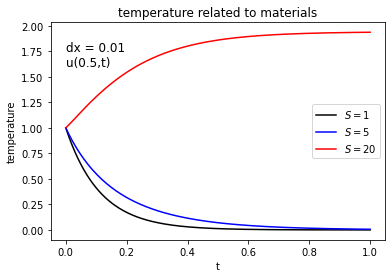

In [52]:
# U[1:J, 1] = TDMA(lower, main, upper, RHS[1:J])
def value(u_0,J,S,t,r):
    U[:,0] = u_0
    upper = np.ones(J - 2) * (- r)
    main = np.ones(J - 1) * (1 + 2 * r)
    lower = np.ones(J - 2) * (- r)
    for n in range(1,len(t)):
        u = U[:, n - 1]
        RHS = RHS_cal(u, J, S)
        U[1:J,n] = TDMA(lower, main, upper, RHS[1:J])
    return U
    
# S = 1
S_1 = value(u_0, J, 1, t, r)
u_1 = S_1[50,:]
plt.plot(t,u_1,color='black', label = '$S = 1$')

# S = 5
S_2 = value(u_0, J, 5, t, r)
u_2 = S_2[50,:]
plt.plot(t,u_2,color='blue', label = '$S = 5$')

# S = 20
S_3 = value(u_0, J, 20, t, r)
u_3 = S_3[50,:]
plt.plot(t,u_3,color='red', label = '$S = 20$')
plt.text(0.0,1.60,"u(0.5,t)",fontdict={'size':'12','color':'black'})
plt.text(0.0,1.75,"dx = 0.01",fontdict={'size':'12','color':'black'})
plt.legend()
plt.xlabel('t')
plt.ylabel('temperature')
plt.title('temperature related to materials')
plt.savefig("Expand heat equation 0.01.png")

After some calculation, the expanding heat equation becomes:
$
log(e^u-1)=T+C
$

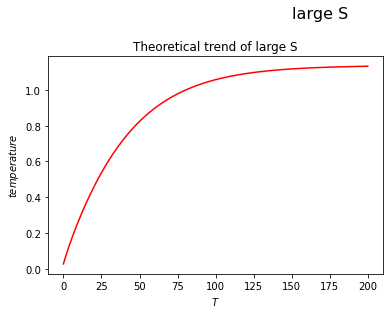

In [16]:
LHS = np.zeros(N+1)
for i in range(0,N+1):
    LHS[i] = math.log(math.exp(U[25,i])-1)
T = np.arange(N + 1)
plt.plot(T,LHS,color='red')
plt.xlabel('$T$')
plt.ylabel('$temperature$')
plt.text(150.0,1.4,"large S",fontdict={'size':'16','color':'black'})
plt.title('Theoretical trend of large S')
plt.savefig("Theoretical.png")